<a href="https://colab.research.google.com/github/girishthorat/FluShotLearning/blob/main/Data_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [ ]:
data_labels = pd.read_csv('/content/drive/MyDrive/Compete/training_set_labels.csv')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Compete/training_set_features.csv')


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Compete/test_set_features.csv')

In [ ]:
data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [ ]:
data['employment_industry'].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

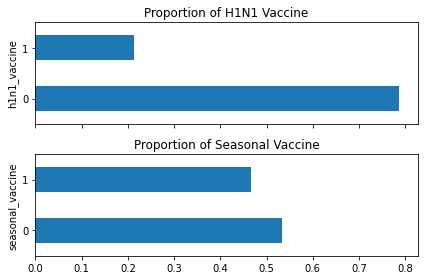

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = data_labels.shape[0]

(data_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(data_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [ ]:
Data=data.copy(deep=True)

In [ ]:
Data['h1n1_vaccine']=data_labels['h1n1_vaccine']
Data['seasonal_vaccine']=data_labels['seasonal_vaccine']

In [ ]:
Data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [ ]:
counts = (Data[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


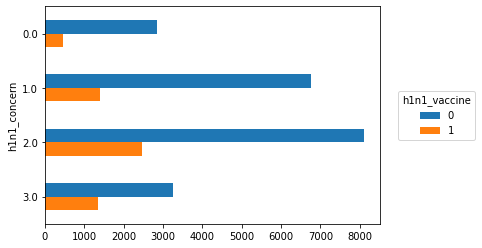

In [ ]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

In [ ]:
h1n1_concern_counts = counts.sum(axis='columns')
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


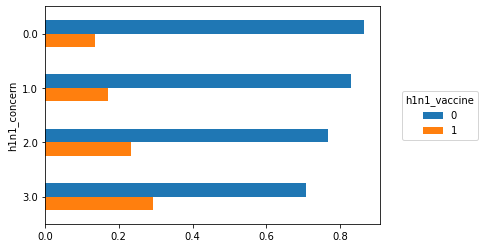

In [ ]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

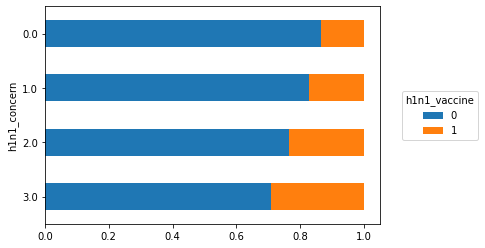

In [ ]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [ ]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (Data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [ ]:
cols_to_plot=data.columns[1:]

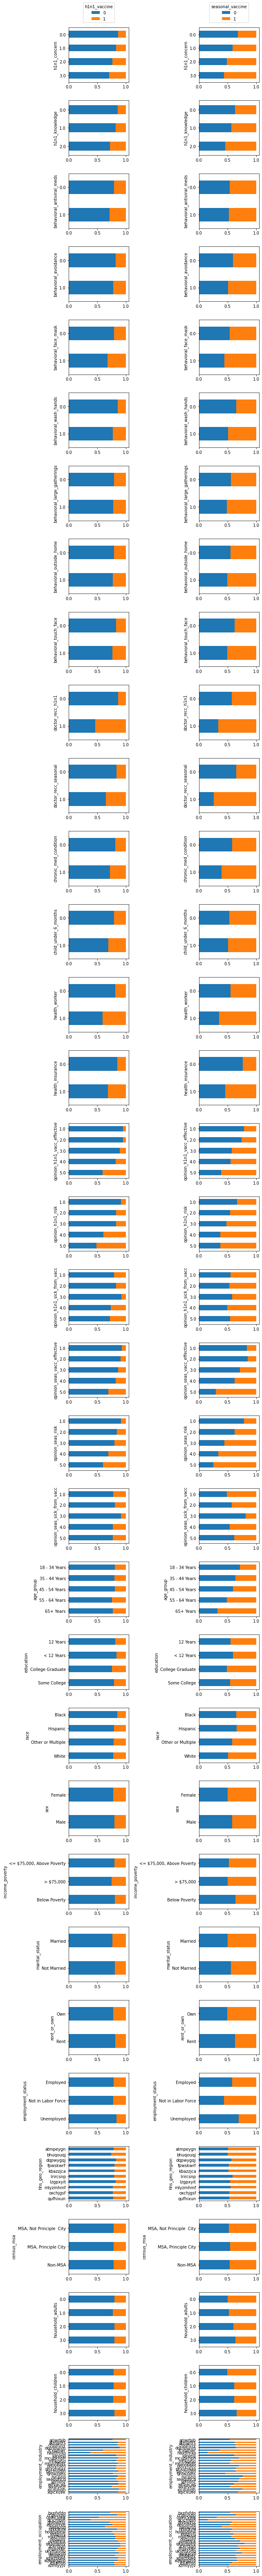

In [ ]:
# cols_to_plot = [
#     'h1n1_concern',
#     'h1n1_knowledge',
#     'opinion_h1n1_vacc_effective',
#     'opinion_h1n1_risk',
#     'opinion_h1n1_sick_from_vacc',
#     'opinion_seas_vacc_effective',
#     'opinion_seas_risk',
#     'opinion_seas_sick_from_vacc',
#     'sex',
#     'age_group',
#     'race',
# ]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', Data, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', Data, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [ ]:
# drop ['household_adults','household_children','census_msa','hhs_geo_region','marital_status','sex',]

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
(Data.isnull().sum(axis = 1)>6).value_counts()


False    25365
dtype: int64

In [ ]:
Data.dropna(axis=0,how='any',thresh=32,inplace=True)
Data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [ ]:
Data.isnull().sum(axis = 0)


respondent_id                      0
h1n1_concern                      62
h1n1_knowledge                   101
behavioral_antiviral_meds         58
behavioral_avoidance             183
behavioral_face_mask              13
behavioral_wash_hands             32
behavioral_large_gatherings       73
behavioral_outside_home           67
behavioral_touch_face            105
doctor_recc_h1n1                1878
doctor_recc_seasonal            1878
chronic_med_condition            221
child_under_6_months               4
health_worker                     12
health_insurance               10955
opinion_h1n1_vacc_effective       81
opinion_h1n1_risk                 35
opinion_h1n1_sick_from_vacc       11
opinion_seas_vacc_effective       37
opinion_seas_risk                 24
opinion_seas_sick_from_vacc        9
age_group                          0
education                        150
race                               0
sex                                0
income_poverty                  3100
m

In [ ]:
cols_to_plot=Data.columns[1:36]
cols_to_plot

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

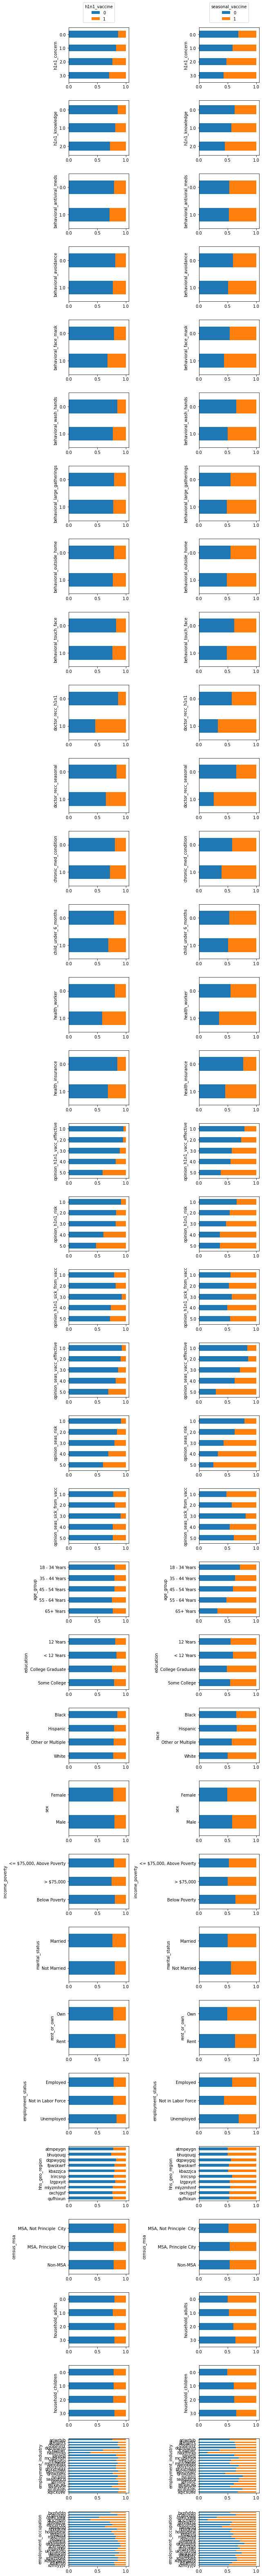

In [ ]:
# cols_to_plot = [
#     'h1n1_concern',
#     'h1n1_knowledge',
#     'opinion_h1n1_vacc_effective',
#     'opinion_h1n1_risk',
#     'opinion_h1n1_sick_from_vacc',
#     'opinion_seas_vacc_effective',
#     'opinion_seas_risk',
#     'opinion_seas_sick_from_vacc',
#     'sex',
#     'age_group',
#     'race',
# ]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', Data, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', Data, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [ ]:
Data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [ ]:
counts = (Data[['employment_industry', 'h1n1_vaccine']]
              .groupby(['employment_industry', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
employment_industry,,
arjwrbjb,663,208
atmlpfrs,802,124
cfqqtusy,278,47
dotnnunm,179,22
fcxhlnwr,1486,982
haxffmxo,56,92
ldnlellj,1019,212
mcubkhph,238,37
mfikgejo,514,100


In [ ]:
Data.reset_index(drop=True, inplace=True)

In [ ]:

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
Dataimp = imp_mean.fit_transform(Data)
Data_imp = pd.DataFrame(Dataimp, index=Data.index, columns=Data.columns)


In [ ]:
Data_imp

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,fcxhlnwr,xtkaffoo,0,0
1,1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe,0,1
2,2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,3,1,1,4,1,2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo,0,0
3,3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,1,3,3,5,5,4,1,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,fcxhlnwr,xtkaffoo,0,1
4,4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,1,3,3,2,3,1,4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25360,26702,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3,1,1,5,2,2,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0,0,fcxhlnwr,xtkaffoo,0,0
25361,26703,1,2,0,1,0,1,0,0,0,1,1,0,0,1,1,4,2,2,5,1,1,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1,0,fcxhlnwr,cmhcxjea,0,0
25362,26704,2,2,0,1,1,1,1,0,1,0,0,0,0,0,1,4,4,2,5,4,2,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0,0,fcxhlnwr,xtkaffoo,0,1
25363,26705,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1,2,2,1,2,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1,0,fcxhlnwr,haliazsg,0,0


In [ ]:
Data_imp.isnull().sum(axis = 0).value_counts()


0    38
dtype: int64

In [ ]:
a=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,31,32,35,36]
b=[21,22,23,24,25,26,27,28,29,30,33,34]

In [ ]:
Data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25365 entries, 0 to 25364
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 25365 non-null  object
 1   h1n1_knowledge               25365 non-null  object
 2   behavioral_antiviral_meds    25365 non-null  object
 3   behavioral_avoidance         25365 non-null  object
 4   behavioral_face_mask         25365 non-null  object
 5   behavioral_wash_hands        25365 non-null  object
 6   behavioral_large_gatherings  25365 non-null  object
 7   behavioral_outside_home      25365 non-null  object
 8   behavioral_touch_face        25365 non-null  object
 9   doctor_recc_h1n1             25365 non-null  object
 10  doctor_recc_seasonal         25365 non-null  object
 11  chronic_med_condition        25365 non-null  object
 12  child_under_6_months         25365 non-null  object
 13  health_worker                25

In [ ]:
Data_imp.drop(['respondent_id'], axis=1, inplace=True)

In [ ]:
Data_use=Data_imp.copy(deep=True)

In [ ]:
# Data_use=Data_imp[Data_imp.columns[a]].astype('int')
Data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25365 entries, 0 to 25364
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                25365 non-null  object
 1   h1n1_concern                 25365 non-null  object
 2   h1n1_knowledge               25365 non-null  object
 3   behavioral_antiviral_meds    25365 non-null  object
 4   behavioral_avoidance         25365 non-null  object
 5   behavioral_face_mask         25365 non-null  object
 6   behavioral_wash_hands        25365 non-null  object
 7   behavioral_large_gatherings  25365 non-null  object
 8   behavioral_outside_home      25365 non-null  object
 9   behavioral_touch_face        25365 non-null  object
 10  doctor_recc_h1n1             25365 non-null  object
 11  doctor_recc_seasonal         25365 non-null  object
 12  chronic_med_condition        25365 non-null  object
 13  child_under_6_months         25

In [ ]:
Data_use[Data_imp.columns[b]]=Data_imp[Data_imp.columns[b]]

In [ ]:
Data.columns[b]

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [ ]:
Data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25365 entries, 0 to 25364
Data columns (total 82 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   18 - 34 Years              25365 non-null  int64
 1   35 - 44 Years              25365 non-null  int64
 2   45 - 54 Years              25365 non-null  int64
 3   55 - 64 Years              25365 non-null  int64
 4   65+ Years                  25365 non-null  int64
 5   12 Years                   25365 non-null  int64
 6   < 12 Years                 25365 non-null  int64
 7   College Graduate           25365 non-null  int64
 8   Some College               25365 non-null  int64
 9   Black                      25365 non-null  int64
 10  Hispanic                   25365 non-null  int64
 11  Other or Multiple          25365 non-null  int64
 12  White                      25365 non-null  int64
 13  Female                     25365 non-null  int64
 14  Male                  

In [ ]:
#drop
Data_use.drop(['respondent_id'], axis=1, inplace=True)

In [ ]:
Data_use.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)


In [ ]:
Data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25365 entries, 0 to 25364
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 25365 non-null  object
 1   h1n1_knowledge               25365 non-null  object
 2   behavioral_antiviral_meds    25365 non-null  object
 3   behavioral_avoidance         25365 non-null  object
 4   behavioral_face_mask         25365 non-null  object
 5   behavioral_wash_hands        25365 non-null  object
 6   behavioral_large_gatherings  25365 non-null  object
 7   behavioral_outside_home      25365 non-null  object
 8   behavioral_touch_face        25365 non-null  object
 9   doctor_recc_h1n1             25365 non-null  object
 10  doctor_recc_seasonal         25365 non-null  object
 11  chronic_med_condition        25365 non-null  object
 12  child_under_6_months         25365 non-null  object
 13  health_worker                25

In [ ]:
b

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34]

In [ ]:
Data_use[Data_use.columns[b]]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,fcxhlnwr,xtkaffoo
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",fcxhlnwr,xtkaffoo
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
25360,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,fcxhlnwr,xtkaffoo
25361,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
25362,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
25363,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [ ]:
# Convert categorical features into dummy variables

# categor = Data_use.select_dtypes(include=['object']).columns.to_list()

Data_use=enc.fit_transform(Data_use[Data_use.columns[b]])
# Data_use = pd.get_dummies(Data_use, categor, drop_first=True)
flat_list = [item for sublist in enc.categories_ for item in sublist]

Data_use=pd.DataFrame(Data_use, columns=list(flat_list))

   # transactions_df[i] = transactions_df[i].cat.codes
# boo = Data_use.select_dtypes(include=['bool']).columns.to_list()
# for column in boo:
#     Data_use[column] = data[column].astype(int)

In [ ]:
Data_use[Data_imp.columns[a]]=Data_imp[Data_imp.columns[a]]

In [ ]:
Data_imp.columns[a]

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [ ]:
Data_use

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,Female,Male,"<= $75,000, Above Poverty","> $75,000",Below Poverty,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Not Principle City","MSA, Principle City",Non-MSA,arjwrbjb,atmlpfrs,...,hodpvpew,kldqjyjy,mxkfnird,oijqvulv,pvmttkik,qxajmpny,rcertsgn,tfqavkke,ukymxvdu,uqqtjvyb,vlluhbov,xgwztkwe,xqwwgdyp,xtkaffoo,xzmlyyjv,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,3,1,1,4,1,2,2,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1,1,0,0,1,3,3,5,5,4,1,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,1,0,1,0,0,0,0,0,1,3,3,2,3,1,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25360,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3,1,1,5,2,2,0,0,0,0
25361,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0,1,0,0,0,1,1,0,0,1,1,4,2,2,5,1,1,1,0,0,0
25362,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,1,1,1,1,0,1,0,0,0,0,0,1,4,4,2,5,4,2,0,0,0,1
25363,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1,2,2,1,2,1,0,0,0


In [ ]:
Data_use=Data_use.astype(int)

In [ ]:
Data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25365 entries, 0 to 25364
Columns: 107 entries, 18 - 34 Years to seasonal_vaccine
dtypes: int64(107)
memory usage: 20.7 MB


In [ ]:
Data_use.to_pickle('Data_use.pickle')


In [ ]:
y_h1n1=Data_use['h1n1_vaccine']
y_seasonal=Data_use['seasonal_vaccine']
Data_use.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1, inplace=True)

In [ ]:
# define standard scaler
scaler = StandardScaler()
scaler.fit(Data_use)
# transform data
Data_scaled = scaler.transform(Data_use)
Data_scaled.shape

(25365, 105)

In [ ]:
Data_scaled = pd.DataFrame(Data_scaled, index=Data_use.index, columns=Data_use.columns)


In [ ]:
Data_scaled

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,Female,Male,"<= $75,000, Above Poverty","> $75,000",Below Poverty,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Not Principle City","MSA, Principle City",Non-MSA,arjwrbjb,atmlpfrs,...,haliazsg,hfxkjkmi,hodpvpew,kldqjyjy,mxkfnird,oijqvulv,pvmttkik,qxajmpny,rcertsgn,tfqavkke,ukymxvdu,uqqtjvyb,vlluhbov,xgwztkwe,xqwwgdyp,xtkaffoo,xzmlyyjv,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,-0.485727,-0.403929,-0.495129,1.925081,-0.591905,-0.542705,3.135361,-0.821536,-0.619270,-0.292413,-0.262831,-0.250972,0.504124,0.822815,-0.822815,-1.292176,-0.605698,2.901528,-1.080802,1.080802,0.551708,-0.551708,-1.086823,1.221532,-0.246324,-0.288983,-0.347004,-0.207909,-0.371559,-0.344646,-0.290901,-0.434809,-0.302852,2.87414,-0.364932,-0.878166,-0.644009,1.638321,-0.188573,-0.194654,...,-0.108662,-0.176464,-0.090929,-0.137253,-0.251416,-0.117254,-0.062278,-0.148599,-0.104885,-0.124637,-0.122001,-0.134696,-0.11897,-0.211087,-0.139619,0.907618,-0.099367,-0.685534,-2.090067,-0.222842,-1.649002,-0.268698,-2.186745,-0.743697,1.412334,0.686007,-0.507627,-0.66632,-0.627318,-0.298251,-0.355503,0.270800,-0.864477,-1.045576,-0.260388,-1.894161,-1.245243,-0.084123,-1.178750,-0.563303
1,-0.485727,2.475683,-0.495129,-0.519459,-0.591905,1.842621,-0.318943,-0.821536,-0.619270,-0.292413,-0.262831,-0.250972,0.504124,-1.215340,1.215340,-1.292176,-0.605698,2.901528,-1.080802,1.080802,-1.812554,1.812554,0.920113,-0.818644,-0.246324,-0.288983,2.881812,-0.207909,-0.371559,-0.344646,-0.290901,-0.434809,-0.302852,-0.34793,-0.364932,1.138737,-0.644009,-0.610381,-0.188573,-0.194654,...,-0.108662,-0.176464,-0.090929,-0.137253,-0.251416,-0.117254,-0.062278,-0.148599,-0.104885,-0.124637,-0.122001,-0.134696,-0.11897,4.737373,-0.139619,-1.101785,-0.099367,1.528865,1.190029,-0.222842,0.606427,-0.268698,0.457301,-0.743697,1.412334,0.686007,-0.507627,-0.66632,-0.627318,-0.298251,-0.355503,0.270800,1.137665,1.291834,1.211583,-0.035934,-0.523154,1.419598,-1.178750,-0.563303
2,2.058771,-0.403929,-0.495129,-0.519459,-0.591905,-0.542705,-0.318943,1.217233,-0.619270,-0.292413,-0.262831,-0.250972,0.504124,-1.215340,1.215340,0.773888,-0.605698,-0.344646,-1.080802,1.080802,0.551708,-0.551708,0.920113,-0.818644,-0.246324,-0.288983,-0.347004,-0.207909,-0.371559,-0.344646,-0.290901,-0.434809,-0.302852,-0.34793,2.740235,1.138737,-0.644009,-0.610381,-0.188573,-0.194654,...,-0.108662,-0.176464,-0.090929,-0.137253,-0.251416,-0.117254,-0.062278,-0.148599,-0.104885,-0.124637,-0.122001,-0.134696,-0.11897,-0.211087,-0.139619,0.907618,-0.099367,-0.685534,-0.450019,-0.222842,0.606427,-0.268698,-2.186745,-0.743697,-0.708048,-1.457712,-0.507627,-0.66632,1.594087,-0.298251,-0.355503,0.270800,-0.864477,-1.045576,-0.996373,-0.035934,-1.245243,-0.084123,1.486519,-0.563303
3,-0.485727,-0.403929,-0.495129,-0.519459,1.689461,1.842621,-0.318943,-0.821536,-0.619270,-0.292413,-0.262831,-0.250972,0.504124,0.822815,-0.822815,-1.292176,-0.605698,2.901528,-1.080802,1.080802,-1.812554,1.812554,-1.086823,1.221532,-0.246324,-0.288983,-0.347004,-0.207909,-0.371559,-0.344646,3.437598,-0.434809,-0.302852,-0.34793,-0.364932,-0.878166,1.552774,-0.610381,-0.188573,-0.194654,...,-0.108662,-0.176464,-0.090929,-0.137253,-0.251416,-0.117254,-0.062278,-0.148599,-0.104885,-0.124637,-0.122001,-0.134696,-0.11897,-0.211087,-0.139619

In [ ]:
y_train.value_counts()

0    15924
1     4368
Name: h1n1_vaccine, dtype: int64

In [ ]:
D_h1n1=Data_scaled[['doctor_recc_h1n1','doctor_recc_seasonal','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_risk']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data_scaled, y_h1n1, test_size = 0.20)

In [ ]:
# for seasonal
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
lr_yhat = lr.predict(X_test)
print(classification_report(y_test, lr_yhat))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4007
           1       0.50      0.75      0.60      1066

    accuracy                           0.79      5073
   macro avg       0.71      0.77      0.73      5073
weighted avg       0.83      0.79      0.80      5073



In [ ]:
lr.predict_proba(X_test)[:,1]


array([0.96438623, 0.06242911, 0.64759246, ..., 0.26470548, 0.11850043,
       0.94556683])

In [ ]:
lr_yhat

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
lr_auc = roc_auc_score(y_test, (lr.predict_proba(X_test))[:,1])
lr_auc

0.841245222361805

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1335
           1       0.77      0.75      0.76      1202

    accuracy                           0.78      2537
   macro avg       0.78      0.78      0.78      2537
weighted avg       0.78      0.78      0.78      2537



In [ ]:
rf.feature_importances_

array([2.88474282e-02, 2.21694987e-02, 4.56150614e-03, 1.24364221e-02,
       5.72239929e-03, 9.85671024e-03, 1.33289636e-02, 1.32763216e-02,
       1.36558844e-02, 1.67518883e-02, 6.61855650e-02, 1.61625716e-02,
       6.78547282e-03, 1.10519607e-02, 7.32513217e-03, 3.38410419e-02,
       3.59914529e-02, 2.75725247e-02, 8.62580419e-02, 9.12498450e-02,
       3.00545709e-02, 2.32862355e-02, 2.02141864e-02, 7.86662927e-03,
       9.49394051e-03, 1.21421844e-02, 3.01432192e-02, 7.38165157e-03,
       1.35312058e-02, 1.24637093e-02, 5.46872547e-03, 5.11391230e-03,
       1.16888929e-02, 1.47912422e-02, 1.22798393e-02, 8.18832030e-03,
       1.39853918e-02, 1.33859145e-02, 1.03312799e-02, 5.19348071e-03,
       9.17281696e-03, 4.53302756e-03, 9.43535352e-03, 8.94134758e-03,
       7.42123811e-03, 1.05280097e-02, 7.06410300e-03, 8.94913567e-03,
       9.34058348e-03, 1.37280880e-02, 1.33256720e-02, 3.22283186e-03,
       1.73824565e-03, 1.11233887e-03, 1.14366105e-02, 2.46057468e-03,
      

In [ ]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  # fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True))

#Define size of bar plot
  plt.figure(figsize=(20,16))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

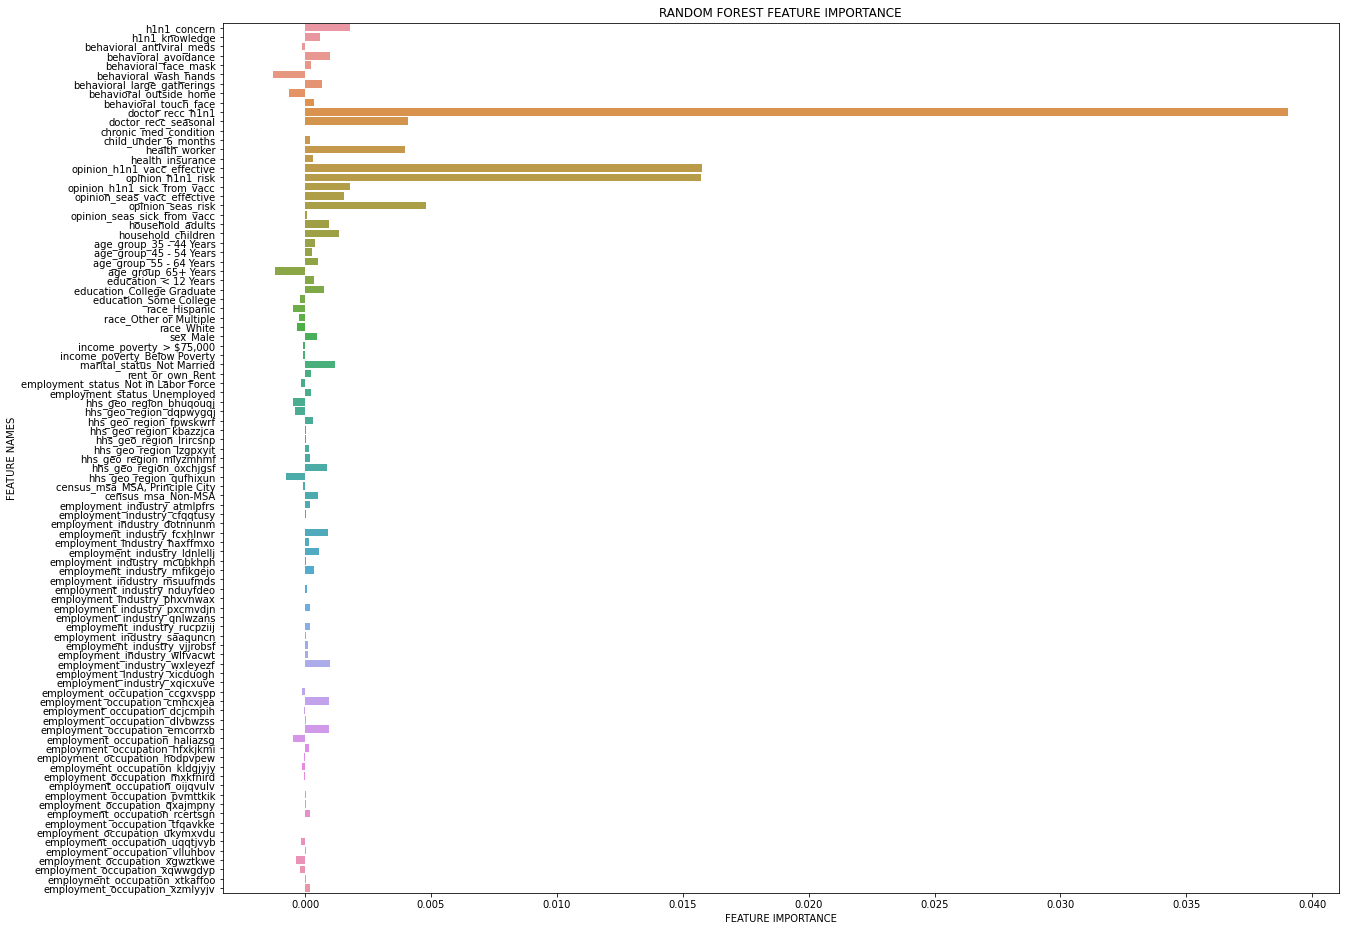

In [ ]:
plot_feature_importance(forest_importances.values,X_train.columns,'RANDOM FOREST ') #imbalanced

In [ ]:
import seaborn as sns


In [ ]:
from sklearn.inspection import permutation_importance
# forest = RandomForestClassifier(random_state=0)

result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)


forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
forest_importances.head(25)

h1n1_concern                   1.793810e-03
h1n1_knowledge                 5.913661e-04
behavioral_antiviral_meds     -1.182732e-04
behavioral_avoidance           1.005322e-03
behavioral_face_mask           2.168342e-04
behavioral_wash_hands         -1.261581e-03
behavioral_large_gatherings    6.899271e-04
behavioral_outside_home       -6.307905e-04
behavioral_touch_face          3.548196e-04
doctor_recc_h1n1               3.903016e-02
doctor_recc_seasonal           4.080426e-03
chronic_med_condition         -4.440892e-17
child_under_6_months           1.774098e-04
health_worker                  3.962153e-03
health_insurance               3.153952e-04
opinion_h1n1_vacc_effective    1.576976e-02
opinion_h1n1_risk              1.571062e-02
opinion_h1n1_sick_from_vacc    1.774098e-03
opinion_seas_vacc_effective    1.557264e-03
opinion_seas_risk              4.809777e-03
opinion_seas_sick_from_vacc    7.884881e-05
household_adults               9.658979e-04
household_children             1

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(Data_scaled, y_h1n1)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 4368
Before OverSampling, counts of label '0': 15924 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (39862, 105)
After OverSampling, the shape of train_y: (39862,) 

After OverSampling, counts of label '1': 19931
After OverSampling, counts of label '0': 19931


In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3962
           1       0.70      0.41      0.51      1111

    accuracy                           0.83      5073
   macro avg       0.77      0.68      0.71      5073
weighted avg       0.82      0.83      0.81      5073



In [ ]:
p=rf.predict_proba(X_test)

In [ ]:
p[:,1]

array([0.271, 0.133, 0.191, ..., 0.075, 0.263, 0.349])

In [ ]:
rf_yhat

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_miss, y_train_miss)
lr_yhat = lr.predict(X_test)
print(classification_report(y_test, lr_yhat))

              precision    recall  f1-score   support

           0       0.87      0.39      0.54      3962
           1       0.27      0.79      0.40      1111

    accuracy                           0.48      5073
   macro avg       0.57      0.59      0.47      5073
weighted avg       0.74      0.48      0.51      5073



In [ ]:
# test

In [ ]:
test.drop(['respondent_id'], axis=1, inplace=True)

In [ ]:
test


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [ ]:
imp_mean = SimpleImputer(strategy='most_frequent')
testimp = imp_mean.fit_transform(test)
test_imp = pd.DataFrame(testimp, index=test.index, columns=test.columns)

In [ ]:
a1=a
a1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 31,
 32,
 35,
 36]

In [ ]:
a1=[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 31,32]

In [ ]:
test_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 26708 non-null  object
 1   h1n1_knowledge               26708 non-null  object
 2   behavioral_antiviral_meds    26708 non-null  object
 3   behavioral_avoidance         26708 non-null  object
 4   behavioral_face_mask         26708 non-null  object
 5   behavioral_wash_hands        26708 non-null  object
 6   behavioral_large_gatherings  26708 non-null  object
 7   behavioral_outside_home      26708 non-null  object
 8   behavioral_touch_face        26708 non-null  object
 9   doctor_recc_h1n1             26708 non-null  object
 10  doctor_recc_seasonal         26708 non-null  object
 11  chronic_med_condition        26708 non-null  object
 12  child_under_6_months         26708 non-null  object
 13  health_worker                26

In [ ]:
t_use=enc.fit_transform(test_imp[test_imp.columns[b]])
# Data_use = pd.get_dummies(Data_use, categor, drop_first=True)
flat_list = [item for sublist in enc.categories_ for item in sublist]

test_use=pd.DataFrame(t_use, columns=list(flat_list))


In [ ]:
test_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 82 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   18 - 34 Years              26708 non-null  float64
 1   35 - 44 Years              26708 non-null  float64
 2   45 - 54 Years              26708 non-null  float64
 3   55 - 64 Years              26708 non-null  float64
 4   65+ Years                  26708 non-null  float64
 5   12 Years                   26708 non-null  float64
 6   < 12 Years                 26708 non-null  float64
 7   College Graduate           26708 non-null  float64
 8   Some College               26708 non-null  float64
 9   Black                      26708 non-null  float64
 10  Hispanic                   26708 non-null  float64
 11  Other or Multiple          26708 non-null  float64
 12  White                      26708 non-null  float64
 13  Female                     26708 non-null  flo

In [ ]:
test_use[test_imp.columns[a1]]=test_imp[test_imp.columns[a1]]

In [ ]:
test_use

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,Female,Male,"<= $75,000, Above Poverty","> $75,000",Below Poverty,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Not Principle City","MSA, Principle City",Non-MSA,arjwrbjb,atmlpfrs,...,haliazsg,hfxkjkmi,hodpvpew,kldqjyjy,mxkfnird,oijqvulv,pvmttkik,qxajmpny,rcertsgn,tfqavkke,ukymxvdu,uqqtjvyb,vlluhbov,xgwztkwe,xqwwgdyp,xtkaffoo,xzmlyyjv,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0,1,0,1,1,0,1,0,0,0,0,0,1,5,1,1,5,1,1,1,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,4,1,1,3,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0,0,1,1,1,1,1,0,0,0,0,0,1,5,4,2,5,4,4,1,0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,4,2,2,4,4,2,1,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,1,1,0,1,1,1,1,0,0,0,0,1,1,5,2,4,4,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0,1,0,1,0,0,1,1,1,0,0,0,1,4,2,2,4,2,1,1,1
26704,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1,0,1,0,1,1,1,1,0,0,0,0,1,0,4,1,1,5,2,2,1,3
26705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,3,1,4,3,1,1,0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,0,1,0,1,0,1,0,0,0,0,1,0,1,2,3,4,4,3,2,1,0


In [ ]:
test_scaled = scaler.transform(test_use)
test_scaled.shape

(26708, 105)

In [ ]:
test_scaled = pd.DataFrame(test_scaled, index=test_use.index, columns=test_use.columns)


In [ ]:
test_scaled

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,Female,Male,"<= $75,000, Above Poverty","> $75,000",Below Poverty,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Not Principle City","MSA, Principle City",Non-MSA,arjwrbjb,atmlpfrs,...,haliazsg,hfxkjkmi,hodpvpew,kldqjyjy,mxkfnird,oijqvulv,pvmttkik,qxajmpny,rcertsgn,tfqavkke,ukymxvdu,uqqtjvyb,vlluhbov,xgwztkwe,xqwwgdyp,xtkaffoo,xzmlyyjv,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,-0.485727,2.475683,-0.495129,-0.519459,-0.591905,-0.542705,-0.318943,1.217233,-0.619270,-0.292413,3.804721,-0.250972,-1.983639,0.822815,-0.822815,-1.292176,1.650989,-0.344646,-1.080802,1.080802,-1.812554,1.812554,0.920113,-0.818644,-0.246324,-0.288983,-0.347004,-0.207909,-0.371559,-0.344646,-0.290901,-0.434809,3.301948,-0.34793,-0.364932,1.138737,-0.644009,-0.610381,-0.188573,5.137315,...,-0.108662,5.666884,-0.090929,-0.137253,-0.251416,-0.117254,-0.062278,-0.148599,-0.104885,-0.124637,-0.122001,-0.134696,-0.118970,-0.211087,-0.139619,-1.101785,-0.099367,0.421665,1.190029,-0.222842,0.606427,-0.268698,0.457301,1.344633,-0.708048,0.686007,-0.507627,-0.66632,-0.627318,-0.298251,-0.355503,0.270800,1.137665,-1.045576,-0.996373,0.893180,-1.245243,-0.835983,0.153885,-0.563303
1,2.058771,-0.403929,-0.495129,-0.519459,-0.591905,1.842621,-0.318943,-0.821536,-0.619270,-0.292413,-0.262831,-0.250972,0.504124,-1.215340,1.215340,-1.292176,-0.605698,2.901528,-1.080802,1.080802,-1.812554,1.812554,0.920113,-0.818644,-0.246324,-0.288983,2.881812,-0.207909,-0.371559,-0.344646,-0.290901,-0.434809,-0.302852,-0.34793,-0.364932,-0.878166,-0.644009,1.638321,-0.188573,5.137315,...,-0.108662,-0.176464,-0.090929,-0.137253,-0.251416,-0.117254,-0.062278,-0.148599,-0.104885,-0.124637,-0.122001,-0.134696,-0.118970,-0.211087,7.162330,-1.101785,-0.099367,-0.685534,-0.450019,-0.222842,-1.649002,-0.268698,-2.186745,-0.743697,-0.708048,-1.457712,-0.507627,-0.66632,-0.627318,-0.298251,-0.355503,-3.692759,0.136594,-1.045576,-0.996373,-0.035934,-1.245243,-0.835983,2.819154,-0.563303
2,-0.485727,-0.403929,-0.495129,1.925081,-0.591905,-0.542705,-0.318943,1.217233,-0.619270,-0.292413,-0.262831,-0.250972,0.504124,-1.215340,1.215340,-1.292176,1.650989,-0.344646,0.925238,-0.925238,0.551708,-0.551708,0.920113,-0.818644,-0.246324,-0.288983,-0.347004,-0.207909,-0.371559,-0.344646,3.437598,-0.434809,-0.302852,-0.34793,-0.364932,-0.878166,-0.644009,1.638321,-0.188573,-0.194654,...,-0.108662,-0.176464,-0.090929,-0.137253,-0.251416,-0.117254,16.056978,-0.148599,-0.104885,-0.124637,-0.122001,-0.134696,-0.118970,-0.211087,-0.139619,-1.101785,-0.099367,0.421665,1.190029,-0.222842,-1.649002,3.721653,0.457301,1.344633,1.412334,0.686007,-0.507627,-0.66632,-0.627318,-0.298251,-0.355503,0.270800,1.137665,1.291834,-0.260388,0.893180,0.921022,1.419598,0.153885,-0.563303
3,-0.485727,-0.403929,-0.495129,-0.519459,1.689461,1.842621,-0.318943,-0.821536,-0.619270,-0.292413,-0.262831,-0.250972,0.504124,0.822815,-0.822815,0.773888,-0.605698,-0.344646,0.925238,-0.925238,0.551708,-0.551708,-1.086823,1.221532,-0.246324,-0.288983,-0.347004,-0.207909,-0.371559,-0.344646,3.437598,-0.434809,-0.302852,-0.34793,-0.364932,1.138737,-0.644009,-0.610381,-0.188573,-0.194654,...,-0.108662,-0.176464,-0.090929,-0.137253,-0.251416,-0.117254,-0.062278,-0.148599,-0.104885,-0.124637,-0.122001,-0.134696,-0.118970,-0.211087,-0.139619,0.90

In [ ]:
test_scaled.to_pickle('test_scaled.pickle')


In [ ]:
test_scaled.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 105 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   18 - 34 Years                float64
 1   35 - 44 Years                float64
 2   45 - 54 Years                float64
 3   55 - 64 Years                float64
 4   65+ Years                    float64
 5   12 Years                     float64
 6   < 12 Years                   float64
 7   College Graduate             float64
 8   Some College                 float64
 9   Black                        float64
 10  Hispanic                     float64
 11  Other or Multiple            float64
 12  White                        float64
 13  Female                       float64
 14  Male                         float64
 15  <= $75,000, Above Poverty    float64
 16  > $75,000                    float64
 17  Below Poverty                float64
 18  Married                      float64
 19  Not

In [ ]:
Data_scaled.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25365 entries, 0 to 25364
Data columns (total 105 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   18 - 34 Years                float64
 1   35 - 44 Years                float64
 2   45 - 54 Years                float64
 3   55 - 64 Years                float64
 4   65+ Years                    float64
 5   12 Years                     float64
 6   < 12 Years                   float64
 7   College Graduate             float64
 8   Some College                 float64
 9   Black                        float64
 10  Hispanic                     float64
 11  Other or Multiple            float64
 12  White                        float64
 13  Female                       float64
 14  Male                         float64
 15  <= $75,000, Above Poverty    float64
 16  > $75,000                    float64
 17  Below Poverty                float64
 18  Married                      float64
 19  Not

In [ ]:
#for seasonal
lr = LogisticRegression()
lr.fit(Data_scaled, y_seasonal)
lr_yhat = lr.predict(test_scaled)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Data_scaled, y_seasonal)
rf_yhat = rf.predict_proba(test_scaled)

In [ ]:
xgb = XGBClassifier()
xgb.fit(Data_scaled.values, y_seasonal.values)
xgb_yhat = xgb.predict_proba(test_scaled.values)

In [ ]:
svm = SVC(probability=True)
svm.fit(Data_scaled, y_seasonal)
svm_yhat = svm.predict_proba(test_scaled, proba)


NameError: ignored

In [ ]:
lr_seasonal=lr.predict_proba(test_scaled)

In [ ]:
seasonal=xgb_yhat[:,1]

In [ ]:
seasonal

array([0.23314656, 0.0435157 , 0.7757438 , ..., 0.17963775, 0.36695644,
       0.6260077 ], dtype=float32)

In [ ]:
#for h1n1
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
lr_yhat = lr.predict(test_scaled)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_res, y_train_res)
rf_yhat = rf.predict_proba(test_scaled)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)
xgb_yhat = xgb.predict_proba(test_scaled.values)

In [ ]:
lr_h1n1=lr.predict_proba(test_scaled)

In [ ]:
h1n1=xgb_yhat[:,1]

In [ ]:
h1n1

array([0.10975543, 0.03946928, 0.4879751 , ..., 0.4288515 , 0.08618966,
       0.49809706], dtype=float32)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Compete/submission_format.csv')


In [ ]:
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
...,...,...,...
26703,53410,0.5,0.7
26704,53411,0.5,0.7
26705,53412,0.5,0.7
26706,53413,0.5,0.7


In [ ]:
submission['seasonal_vaccine']=seasonal

In [ ]:
submission['h1n1_vaccine']=h1n1

In [ ]:
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.109755,0.233147
1,26708,0.039469,0.043516
2,26709,0.487975,0.775744
3,26710,0.584182,0.851436
4,26711,0.292621,0.530192
...,...,...,...
26703,53410,0.408462,0.495558
26704,53411,0.097755,0.335978
26705,53412,0.428851,0.179638
26706,53413,0.086190,0.366956


In [ ]:
submission.to_csv('my_submission3.csv')
